In [6]:
import construction as cs
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp


import dynamic_metrics as ds


import matplotlib.pyplot as plt

### read font
from matplotlib import font_manager

font_dirs = ['Barlow/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Barlow'

import networkx as nx
%matplotlib inline
%config InlineBackend.figure_format = 'retina'




%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
def load_origin_graph(file_name,gap=299):
    data_in = cs.load_data("../Datasets/"+file_name+".dat")
    gap = 299 
    graphs_in = cs.build_graphs(data_in,gap=gap)
    return graphs_in

def load_ETNgen_graph_unique_dict():
    path = "../unique_dictionary/ETNgen-LH10_uniqueDict.dat"
    gap = 299 
    data_in = cs.load_data(path)
    graphs_in = cs.build_graphs(data_in,gap=gap)
    
    return graphs_in

def load_ETNgen_graph():
    path = "../Generated_graphs/ETNgen-LH10.dat"
    gap = 299 
    data_in = cs.load_data(path)
    graphs_in = cs.build_graphs(data_in,gap=gap)
    
    return graphs_in

In [8]:
import os 

In [9]:
graphs_etn_ud = load_ETNgen_graph_unique_dict()
graphs_etn = load_ETNgen_graph()
orig_graph = load_origin_graph("InVS13")

In [4]:
import os

path = "../unique_dictionary/dynamic_results"
COV = path+"/coverage"
MFPTs = path+"/MFPT"

if not os.path.exists(path):
    os.makedirs(path)
    os.makedirs(COV)
    os.makedirs(MFPTs)

# coverage

k volte, con n0 e t0 random

In [24]:
from scipy.stats import ks_2samp

In [7]:
K = 1000
T = 500
c_orig = ds.coverage(orig_graph,K,T)
c_stab = ds.coverage(orig_graph,K,T)
c_etn = ds.coverage(graphs_etn,K,T)
c_etn_ud = ds.coverage(graphs_etn_ud,K,T)
print("ETN done")

ETN done


In [8]:

print("coverage")
print("orig vs sta    \t",ks_2samp(c_orig, c_stab)[0])
print("orig vs etn    \t",ks_2samp(c_orig, c_etn)[0])
print("orig vs etn ud \t",ks_2samp(c_orig, c_etn_ud)[0])

coverage
orig vs sta    	 0.021
orig vs etn    	 0.132
orig vs etn ud 	 0.22


In [9]:
COV

'../unique_dictionary/dynamic_results/coverage'

In [10]:
np.save(COV+"/stab",c_stab)
np.save(COV+"/orig",c_orig)
np.save(COV+"/etn",c_etn)
np.save(COV+"/etn_ud",c_etn_ud)


# MFPT

In [11]:
MFPTs

'../unique_dictionary/dynamic_results/MFPT'

In [12]:
K = 1
m_ori = ds.MFPT(orig_graph,K)
m_ori2 = [x for x in m_ori if x < max(m_ori)-10]
print(1)
m_stb = ds.MFPT(orig_graph,K)
m_stb2 = [x for x in m_stb if x < max(m_ori)-10]
print(2)

1
2


In [13]:
K = 1
m_etn = ds.MFPT(graphs_etn,K)
m_etn2 = [x for x in m_etn if x < max(m_ori)-10]
print(1)
m_etn_ud = ds.MFPT(graphs_etn_ud,K)
m_etn_ud = [x for x in m_etn_ud if x < max(m_ori)-10]
print(2)

1
2


In [15]:
print("mfpt")
print("orig vs sta   \t",ks_2samp(m_ori2, m_stb2)[0])
print("orig vs etn   \t",ks_2samp(m_ori2, m_etn2)[0])
print("orig vs etn ud\t",ks_2samp(m_ori2, m_etn_ud)[0])

mfpt
orig vs sta   	 0.011976059918420741
orig vs etn   	 0.0559853622268293
orig vs etn ud	 0.16505543518201746


In [ ]:
MFPTs

In [16]:
np.save(MFPTs+"/stab",m_stb2)
np.save(MFPTs+"/orig",m_ori2)
np.save(MFPTs+"/etn",m_etn2)
np.save(MFPTs+"/etn_ud",m_etn_ud)

# SIR model

In [17]:
import os


path = "../unique_dictionary/dynamic_results"
R0 = path+"/R0/"
la025 = R0+"la025"
la015 = R0+"la015"
la001 = R0+"la001"
if not os.path.exists(la001):
    os.makedirs(la025)
    os.makedirs(la015)
    os.makedirs(la001)
path

'../unique_dictionary/dynamic_results'

In [21]:
for lambd in [0.25,0.15,0.01]:
    mu =0.005
    K = 100

    if lambd == 0.25:
        la = la025
    if lambd == 0.15:
        la = la015
    if lambd == 0.01:
        la = la001

    print("R0 lambda",lambd,mu)
    r_ori = ds.compute_r0(K,orig_graph,lambd,mu)
    r_sta = ds.compute_r0(K,orig_graph,lambd,mu)
    
    r_etn = []
    r_etn_ud = []
    r_etn = ds.compute_r0(K,graphs_etn,lambd,mu)
    r_etn_ud = ds.compute_r0(K,graphs_etn_ud,lambd,mu)
        
        
    print("orig vs sta   \t",ks_2samp(r_ori, r_sta)[0])
    print("orig vs etn   \t",ks_2samp(r_ori, r_etn)[0])
    print("orig vs etn ud\t",ks_2samp(r_ori, r_etn_ud)[0])
    
    np.save(la+"/stab",r_sta)
    np.save(la+"/orig",r_ori)
    np.save(la+"/etn",r_etn)
    np.save(la+"/etn_ud",r_etn_ud)

R0 lambda 0.15 0.005
orig vs sta   	 0.16
orig vs etn   	 0.17
orig vs etn ud	 0.21
R0 lambda 0.01 0.005
orig vs sta   	 0.01
orig vs etn   	 0.01
orig vs etn ud	 0.06


# plot

In [17]:
ORIGINAL_COLOR = '#474747' #dark grey
ETN_COLOR =  '#fb7041' #'#E5865E' # arancio
TAG_COLOR = '#96ccc8' # light blue
STM_COLOR = '#bad1f2' #8F2E27' # rosso
DYM_COLOR = '#559ca6' # teal


import os

def load_cov():
    
    ori = np.load("../unique_dictionary/dynamic_results/coverage/orig.npy")
    stb = np.load("../unique_dictionary/dynamic_results/coverage/stab.npy")
    etn = np.load("../unique_dictionary/dynamic_results/coverage/etn.npy")
    etn_ud = np.load("../unique_dictionary/dynamic_results/coverage/etn_ud.npy")
    

    return ori,stb,etn,etn_ud

def load_mfpt():
    
    ori = np.load("../unique_dictionary/dynamic_results/MFPT/orig.npy")
    stb = np.load("../unique_dictionary/dynamic_results/MFPT/stab.npy")
    etn = np.load("../unique_dictionary/dynamic_results/MFPT/etn.npy")
    etn_ud = np.load("../unique_dictionary/dynamic_results/MFPT/etn_ud.npy")
    

    return ori,stb,etn,etn_ud

def load_r0(lambd="la001"):
    
    ori = np.load("../unique_dictionary/dynamic_results/R0/"+lambd+"/orig.npy")
    stb = np.load("../unique_dictionary/dynamic_results/R0/"+lambd+"/stab.npy")
    etn = np.load("../unique_dictionary/dynamic_results/R0/"+lambd+"/etn.npy")
    etn_ud = np.load("../unique_dictionary/dynamic_results/R0/"+lambd+"/etn_ud.npy")

    return ori,stb,etn,etn_ud


def compute_ks_cov_mfpt(cov,mfpt):
    
    mfpt_ms = [ks_2samp(mfpt[0],mfpt[1])[0]]
    cov_ms = [ks_2samp(cov[0],cov[1])[0]]
    
    
    cov_ms.append(ks_2samp(cov[0],cov[2])[0])
    mfpt_ms.append(ks_2samp(mfpt[0],mfpt[2])[0])
    
    cov_ms.append(ks_2samp(cov[0],cov[3])[0])
    mfpt_ms.append(ks_2samp(mfpt[0],mfpt[3])[0])
        
    return cov_ms,mfpt_ms



from matplotlib.patches import Patch
from matplotlib.lines import Line2D


def plot_cov_mfpt(ax,legend=False):
    
    ax.set_ylabel("KS distance")
        
    cov = load_cov()
    mfpt = load_mfpt()
    
    x = np.arange(2)
    cov_ms, mfpt_ms = compute_ks_cov_mfpt(cov,mfpt)
    x1 = np.array([cov_ms[0],mfpt_ms[0]])
    x2 = np.array([cov_ms[1],mfpt_ms[1]])
    x3 = np.array([cov_ms[2],mfpt_ms[2]])

    
    width = 0.2
    rects1 = ax.bar(x - 0.1, x2, width,color="#fc8e69")
    rects4 = ax.bar(x + 0.1, x3, width,color="#c83504")    
    
    ax.plot([-0.25,0.25],[x1[0],x1[0]],linewidth=3, label='Stability',color=ORIGINAL_COLOR)
    ax.plot([1-0.25,1.25],[x1[1],x1[1]],linewidth=3, label='Stability',color=ORIGINAL_COLOR)
    
              
    ax.tick_params(bottom=False, right=False,left=False)
    ax.set_axisbelow(True)
    
    ax.yaxis.grid(True, color='lightgrey')
    ax.xaxis.grid(False)
    
    #ax.yaxis.grid(True, color='#FFFFFF')
    #ax.set_facecolor('#EFEFEF')
    #ax.xaxis.grid(False)
    
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')    
    
    labels = ["Coverage","MFPT"]
    ax.set_xticks(x)
    ax.set_xticklabels(labels,rotation=0)
    
    
def compute_ks_r0(la25,la15,la01):

    res = [[ks_2samp(la25[0], la25[1])[0],ks_2samp(la15[0], la15[1])[0],ks_2samp(la01[0], la01[1])[0]]]
    res.append([ks_2samp(la25[0], la25[2])[0],ks_2samp(la15[0], la15[2])[0],ks_2samp(la01[0], la01[2])[0]])
    res.append([ks_2samp(la25[0], la25[3])[0],ks_2samp(la15[0], la15[3])[0],ks_2samp(la01[0], la01[3])[0]])

    return res
def plot_r0(ax,legend=False):
    
    ax.set_ylabel("KS distance")
    r0_025 = load_r0("la025")
    r0_015 = load_r0("la015")
    r0_001 = load_r0("la001")
    x1,x2,x3 = compute_ks_r0(r0_025,r0_015,r0_001)
    x = np.arange(3)
    width = 0.2
    
    rects1 = ax.bar(x - 0.1, x2, width, label='k = 4',color="#fc8e69")
    rects2 = ax.bar(x + 0.1, x3, width, label='k = 6',color="#c83504")
    
    ax.plot([-0.25,0.25],[x1[0],x1[0]],linewidth=3, label='Stability',color=ORIGINAL_COLOR)
    ax.plot([1-0.25,1.25],[x1[1],x1[1]],linewidth=3, label='Stability',color=ORIGINAL_COLOR)
    ax.plot([2-0.25,2.25],[x1[2],x1[2]],linewidth=3, label='Stability',color=ORIGINAL_COLOR)
    
          
    ax.tick_params(bottom=False, right=False,left=False)
    ax.set_axisbelow(True)
    
    #ax.yaxis.grid(True, color='#FFFFFF')
    #ax.set_facecolor('#EFEFEF')
    #ax.xaxis.grid(False)
    
    ax.yaxis.grid(True, color='lightgrey')
    ax.xaxis.grid(False)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')

    labels = [r"$\lambda$ = 0.25",r"$\lambda$ = 0.15",r"$\lambda$ = 0.01"]
    ax.set_xticks(x)
    ax.set_xticklabels(labels,rotation=0)

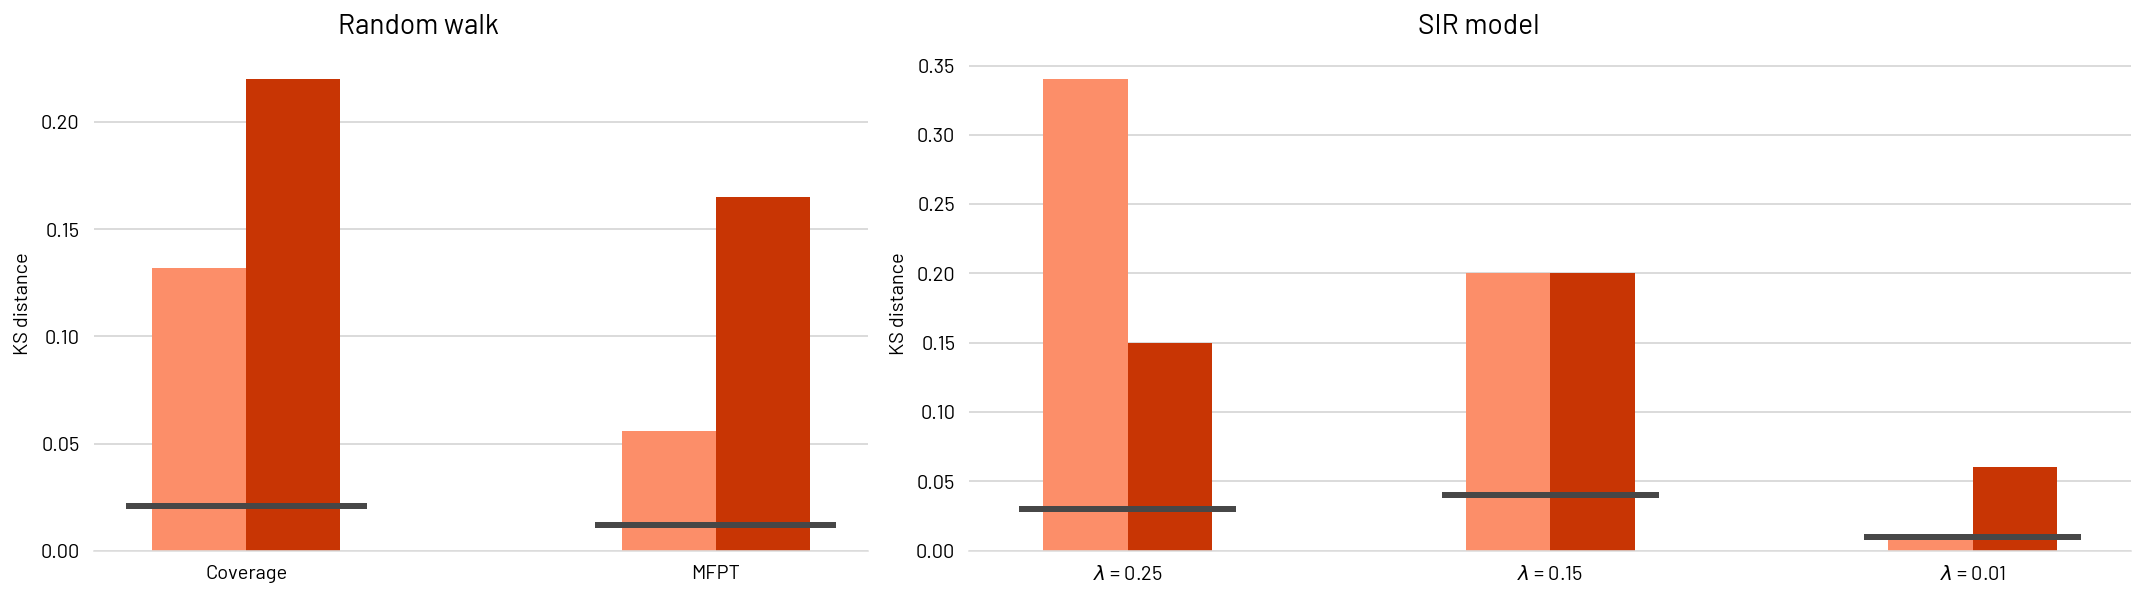

In [108]:

fig, ax = plt.subplots(1,2, figsize=(15,4), gridspec_kw={'width_ratios': [2, 3]})
fig.tight_layout(h_pad=1,w_pad=0)


fig.text(0.16, 1, 'Random walk',fontdict={'size':14})
fig.text(0.66, 1, 'SIR model',fontdict={'size':14})

plot_cov_mfpt(ax[0])
plot_r0(ax[1],legend=True)


fig.tight_layout()
plt.savefig("../unique_dictionary/dynamic_unique_dict.pdf")

# nb interactions 

# hostpital

In [65]:
ORIGINAL_COLOR = '#474747' #dark grey
ETN_COLOR =  '#fb7041' #'#E5865E' # arancio
TAG_COLOR = '#96ccc8' # light blue
STM_COLOR = '#bad1f2' #8F2E27' # rosso
DYM_COLOR = '#559ca6' # teal


def load_origin_graph(file_name,gap=299):
    data_in = cs.load_data("../Datasets/"+file_name+".dat")
    gap = 299 
    graphs_in = cs.build_graphs(data_in,gap=gap)
    return graphs_in

def load_ETNgen_graph_unique_dict():
    path = "../unique_dictionary/ETNgen-LH10_uniqueDict.dat"
    gap = 299 
    data_in = cs.load_data(path)
    graphs_in = cs.build_graphs(data_in,gap=gap)
    
    return graphs_in

def load_ETNgen_graph():
    path = "../Generated_graphs/ETNgen-LH10.dat"
    gap = 299 
    data_in = cs.load_data(path)
    graphs_in = cs.build_graphs(data_in,gap=gap)
    
    return graphs_in

In [66]:
import numpy as np
def nb_interactions(graphs):
    res = []
    for g in graphs:
        res.append(len(g.edges()))
    return(res)
def moving_average(x, w=30):
    return np.convolve(x, np.ones(w), 'valid') / w




from matplotlib.patches import Patch
from matplotlib.lines import Line2D

#colors = ["#fc8e69","#fb7041","#fa551e","#e13c05","#af2e04","#7d2103"]

def plot_nb_inter_one_axes(ax,orig_graphs,etn_gen,etn_gen_ud,legend=False,line_width=1.5):
    
    line_width=2.5

    tmp = moving_average(nb_interactions(orig_graphs))
    x = np.arange(0,(len(tmp)*300)/(60*60*24),(len(tmp)*300)/(60*60*24)/len(tmp))
    ax.plot(x,tmp,color=ORIGINAL_COLOR,label="Original", lw=line_width)
    ax.plot(x,np.zeros(len(x))+np.mean(tmp),color=ORIGINAL_COLOR,
            label="Average original", linestyle='dashed')
    
    tmp = moving_average(nb_interactions(etn_gen))
    x = np.arange(0,(len(tmp)*300)/(60*60*24),(len(tmp)*300)/(60*60*24)/len(tmp))
    ax.plot(x,tmp,color="#fc8e69",label="Multiple dictionaries", lw=line_width)
    ax.plot(x,np.zeros(len(x))+np.mean(tmp),color="#fc8e69",
            label="Average multiple dictionaries", linestyle='dashed')
    
    tmp = moving_average(nb_interactions(etn_gen_ud))
    x = np.arange(0,(len(tmp)*300)/(60*60*24),(len(tmp)*300)/(60*60*24)/len(tmp))
    ax.plot(x,tmp,color="#af2e04",label="Unique dictionary", lw=line_width)
    ax.plot(x,np.zeros(len(x))+np.mean(tmp),color="#af2e04",
            label="Average unique dictionary", linestyle='dashed')
    
    
    
    #ax.set_xlabel("Timestamps")
    ax.set_ylabel("Number of interactions")
    ax.set_title("Workplace unique vs multiple dictionaries")

    ax.tick_params(bottom=False, right=False,left=False)
    ax.set_axisbelow(True)
    #ax.yaxis.grid(True, color='#FFFFFF')
    ax.yaxis.grid(True, color='lightgrey')
    #ax.set_facecolor('#EFEFEF')
    ax.xaxis.grid(False)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')
    
    
    plt.xticks([0,1,2,3,4],labels=["day 0","day 1","day 2","day 3","day 4"],rotation=45)
    
    
    plt.tick_params(bottom=False, right=False,left=False)
    plt.gca().spines['top'].set_color('#DDDDDD')
    plt.gca().spines['right'].set_color('#DDDDDD')
    plt.gca().spines['left'].set_color('#DDDDDD')
    plt.gca().spines['bottom'].set_color('#DDDDDD')
    plt.gca().set_axisbelow(True)
    #plt.gca().yaxis.grid(True, color='#FFFFFF')
    #plt.gca().set_facecolor('#EFEFEF')

    
    
    ax.legend(loc='upper right',ncol = 3,bbox_to_anchor=(1, -0.25))

    plt.gca().yaxis.grid(True, color='lightgrey')
    plt.gca().xaxis.grid(False)


In [67]:
file_name ="LH10"
graphs_etn_ud = load_ETNgen_graph_unique_dict()
graphs_etn = load_ETNgen_graph()
orig_graph = load_origin_graph(file_name)

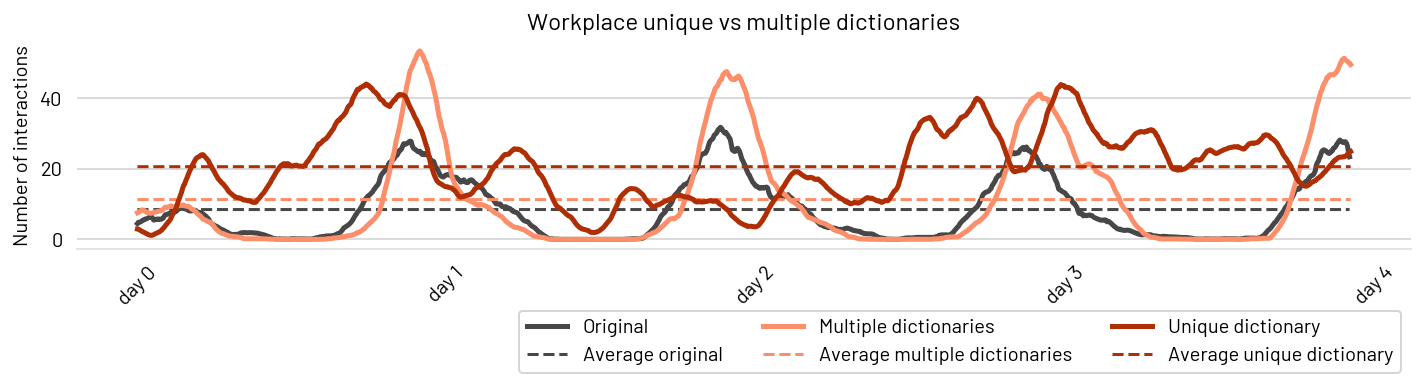

In [68]:
figure, axes = plt.subplots(nrows=1, ncols=1,figsize=(10,3))
plot_nb_inter_one_axes(axes,orig_graph,graphs_etn,graphs_etn_ud,line_width=1)


figure.tight_layout()
plt.savefig("../unique_dictionary/"+file_name+"nb_interacions_unique_dict.pdf", bbox_inches = 'tight')
plt.show()

# invs13

In [62]:

def load_origin_graph(file_name,gap=299):
    data_in = cs.load_data("../Datasets/"+file_name+".dat")
    gap = 299 
    graphs_in = cs.build_graphs(data_in,gap=gap)
    return graphs_in

def load_ETNgen_graph_unique_dict():
    path = "../unique_dictionary/ETNgen-InVS13_uniqueDict.dat"
    gap = 299 
    data_in = cs.load_data(path)
    graphs_in = cs.build_graphs(data_in,gap=gap)
    
    return graphs_in

def load_ETNgen_graph():
    path = "../Generated_graphs/ETNgen-InVS13.dat"
    gap = 299 
    data_in = cs.load_data(path)
    graphs_in = cs.build_graphs(data_in,gap=gap)
    
    return graphs_in


import numpy as np
def nb_interactions(graphs):
    res = []
    for g in graphs:
        res.append(len(g.edges()))
    return(res)
def moving_average(x, w=30):
    return np.convolve(x, np.ones(w), 'valid') / w


from matplotlib.patches import Patch
from matplotlib.lines import Line2D

#colors = ["#fc8e69","#fb7041","#fa551e","#e13c05","#af2e04","#7d2103"]

def plot_nb_inter_one_axes(ax,orig_graphs,etn_gen,etn_gen_ud,legend=False,line_width=1.5):
    
    line_width=2.5

    tmp = moving_average(nb_interactions(orig_graphs))
    x = np.arange(0,(len(tmp)*300)/(60*60*24),(len(tmp)*300)/(60*60*24)/len(tmp))
    ax.plot(x,tmp,color=ORIGINAL_COLOR,label="Original", lw=line_width)
    ax.plot(x,np.zeros(len(x))+np.mean(tmp),color=ORIGINAL_COLOR,
            label="Average original", linestyle='dashed')
    
    tmp = moving_average(nb_interactions(etn_gen))
    x = np.arange(0,(len(tmp)*300)/(60*60*24),(len(tmp)*300)/(60*60*24)/len(tmp))
    ax.plot(x,tmp,color="#fc8e69",label="Multiple dictionaries", lw=line_width)
    ax.plot(x,np.zeros(len(x))+np.mean(tmp),color="#fc8e69",
            label="Average multiple dictionaries", linestyle='dashed')
    
    tmp = moving_average(nb_interactions(etn_gen_ud))
    x = np.arange(0,(len(tmp)*300)/(60*60*24),(len(tmp)*300)/(60*60*24)/len(tmp))
    ax.plot(x,tmp,color="#af2e04",label="Unique dictionary", lw=line_width)
    ax.plot(x,np.zeros(len(x))+np.mean(tmp),color="#af2e04",
            label="Average unique dictionary", linestyle='dashed')
    
    
    
    #ax.set_xlabel("Timestamps")
    ax.set_ylabel("Number of interactions")
    ax.set_title("Workplace unique vs multiple dictionaries")

    ax.tick_params(bottom=False, right=False,left=False)
    ax.set_axisbelow(True)
    #ax.yaxis.grid(True, color='#FFFFFF')
    ax.yaxis.grid(True, color='lightgrey')
    #ax.set_facecolor('#EFEFEF')
    ax.xaxis.grid(False)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')
    
    
    plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],labels=["day 0","day 1","day 2","day 3","day 4","day 5",
                                  "day 6","day 7","day 8","day 9","day 10","day 11"],rotation=45)
    
    
    plt.tick_params(bottom=False, right=False,left=False)
    plt.gca().spines['top'].set_color('#DDDDDD')
    plt.gca().spines['right'].set_color('#DDDDDD')
    plt.gca().spines['left'].set_color('#DDDDDD')
    plt.gca().spines['bottom'].set_color('#DDDDDD')
    plt.gca().set_axisbelow(True)
    #plt.gca().yaxis.grid(True, color='#FFFFFF')
    #plt.gca().set_facecolor('#EFEFEF')

    
    
    ax.legend(loc='upper right',ncol = 3,bbox_to_anchor=(1, -0.25))

    plt.gca().yaxis.grid(True, color='lightgrey')
    plt.gca().xaxis.grid(False)


In [63]:
file_name ="InVS13"
graphs_etn_ud = load_ETNgen_graph_unique_dict()
graphs_etn = load_ETNgen_graph()
orig_graph = load_origin_graph(file_name)

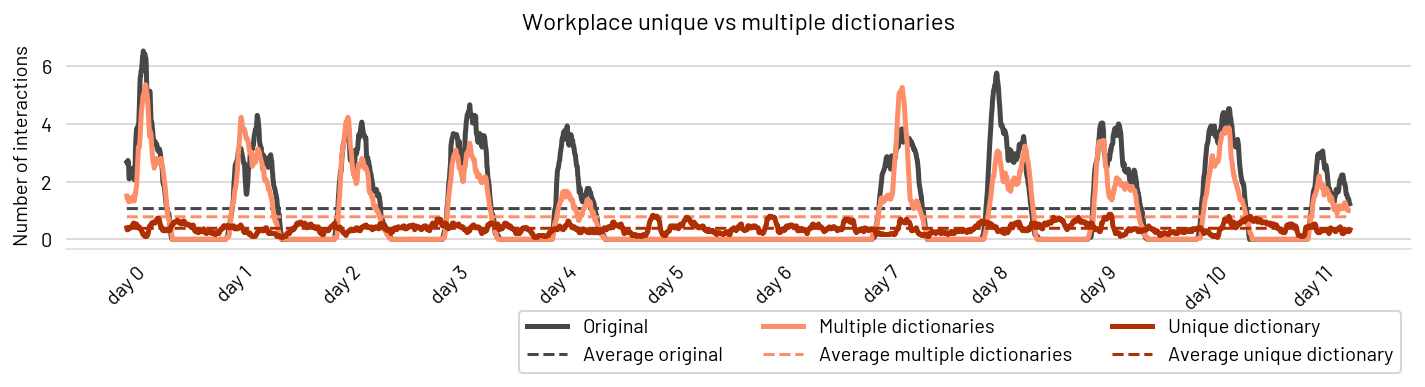

In [64]:
figure, axes = plt.subplots(nrows=1, ncols=1,figsize=(10,3))
plot_nb_inter_one_axes(axes,orig_graph,graphs_etn,graphs_etn_ud,line_width=1)


figure.tight_layout()
plt.savefig("../unique_dictionary/"+file_name+"nb_interacions_unique_dict.pdf", bbox_inches = 'tight')
plt.show()

# highschool

In [156]:


def load_dym_graph(file_name):
    path = "../Competitors_generated_graphs/Dymond/Multiple_run/"+file_name+"/"
    gap = 0 
    graphs = []
    for i in os.listdir(path):
        print(path+i)
        data_in = cs.load_data(path+i)
        graphs_in = cs.build_graphs(data_in,gap=gap)
        break
    return graphs_in

def load_stm_graph(file_name):
    path = "../Competitors_generated_graphs/STM/Multiple_run/"+file_name+"/"
    gap = 0 
    graphs = []
    for i in os.listdir(path):
        print(path+i)
        data_in = cs.load_data(path+i)
        graphs_in = cs.build_graphs(data_in,gap=gap)
        break
    return graphs_in




def load_origin_graph(file_name,gap=299):
    data_in = cs.load_data("../Datasets/"+file_name+".dat")
    gap = 299 
    graphs_in = cs.build_graphs(data_in,gap=gap)
    return graphs_in

def load_ETNgen_graph_unique_dict():
    path = "../unique_dictionary/ETNgen-High_School11_uniqueDict.dat"
    gap = 299 
    data_in = cs.load_data(path)
    graphs_in = cs.build_graphs(data_in,gap=gap)
    
    return graphs_in

def load_ETNgen_graph():
    path = "../Generated_graphs/ETNgen-High_School11.dat"
    gap = 299 
    data_in = cs.load_data(path)
    graphs_in = cs.build_graphs(data_in,gap=gap)
    
    return graphs_in


import numpy as np
def nb_interactions(graphs):
    res = []
    for g in graphs:
        res.append(len(g.edges()))
    return(res)
def moving_average(x, w=30):
    return np.convolve(x, np.ones(w), 'valid') / w



STM_COLOR = '#bad1f2' #8F2E27' # rosso
DYM_COLOR = '#559ca6' # teal
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

#colors = ["#fc8e69","#fb7041","#fa551e","#e13c05","#af2e04","#7d2103"]

def plot_nb_inter_one_axes(ax,orig_graphs,etn_gen,etn_gen_ud,g_d,g_s,legend=False,line_width=1.5):
    
    line_width_2 = 2.5
    medie = []
    tmp = moving_average(nb_interactions(orig_graphs))
    x = np.arange(0,(len(tmp)*300)/(60*60*24),(len(tmp)*300)/(60*60*24)/len(tmp))
    ax.plot(x,tmp,color=ORIGINAL_COLOR,label="Original", lw=line_width,alpha=1)
    xo = x
    tmpo=tmp
    
    medie.append(np.mean(tmp))
    
    
    tmp = moving_average(nb_interactions(etn_gen))
    x = np.arange(0,(len(tmp)*300)/(60*60*24),(len(tmp)*300)/(60*60*24)/len(tmp))
    ax.plot(x,tmp,color="#fc8e69",label="Multiple dictionaries", lw=line_width,alpha=1)
    #ax.plot(x,np.zeros(len(x))+np.mean(tmp),color="#fc8e69",
    #        label="Average multiple dictionaries",lw=line_width_2)
    medie.append(np.mean(tmp))
    
    tmp = moving_average(nb_interactions(etn_gen_ud))
    x = np.arange(0,(len(tmp)*300)/(60*60*24),(len(tmp)*300)/(60*60*24)/len(tmp))
    ax.plot(x,tmp,color="#af2e04",label="Unique dictionary", lw=line_width,alpha=1)
    medie.append(np.mean(tmp))
    #ax.plot(x,np.zeros(len(x))+np.mean(tmp),color="#af2e04",
    #        label="Average unique dictionary",lw=line_width_2)
    
    tmp = moving_average(nb_interactions(g_d))
    x = np.arange(0,(len(tmp)*300)/(60*60*24),(len(tmp)*300)/(60*60*24)/len(tmp))
    ax.plot(x,tmp,color=DYM_COLOR,label="Dymond", lw=line_width,alpha=1)
    medie.append(np.mean(tmp))
    #ax.plot(x,np.zeros(len(x))+np.mean(tmp),color=DYM_COLOR,
    #        label="Average Dymond",lw=line_width_2)
    
    tmp = moving_average(nb_interactions(g_s))
    x = np.arange(0,(len(tmp)*300)/(60*60*24),(len(tmp)*300)/(60*60*24)/len(tmp))
    ax.plot(x,tmp,color=STM_COLOR,label="STM", lw=line_width,alpha=1)
    medie.append(np.mean(tmp))
    #ax.plot(x,np.zeros(len(x))+np.mean(tmp),color=STM_COLOR,
    #        label="Average STM",lw=line_width_2)
    
    
    
    ax.plot(xo,np.zeros(len(xo))+np.mean(tmpo),color=ORIGINAL_COLOR,
            label="Average original",lw=2.5,alpha=1,linestyle='dashed')
    
    #ax.set_xlabel("Timestamps")
    ax.set_ylabel("Number of interactions")
    ax.set_title("High school unique vs multiple dictionaries")

    ax.tick_params(bottom=False, right=False,left=False)
    ax.set_axisbelow(True)
    #ax.yaxis.grid(True, color='#FFFFFF')
    ax.yaxis.grid(True, color='lightgrey')
    #ax.set_facecolor('#EFEFEF')
    ax.xaxis.grid(False)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')
    
    
    ax.set_xticks([0,1,2,3],labels=["day 0","day 1","day 2","day 3"],rotation=45)
    
    
    ax.tick_params(bottom=False, right=False,left=False)
    plt.gca().spines['top'].set_color('#DDDDDD')
    plt.gca().spines['right'].set_color('#DDDDDD')
    plt.gca().spines['left'].set_color('#DDDDDD')
    plt.gca().spines['bottom'].set_color('#DDDDDD')
    plt.gca().set_axisbelow(True)
    #plt.gca().yaxis.grid(True, color='#FFFFFF')
    #plt.gca().set_facecolor('#EFEFEF')

    
    
    #ax.legend(loc='upper right',ncol = 1,bbox_to_anchor=(1, 1))

    plt.gca().yaxis.grid(True, color='lightgrey')
    plt.gca().xaxis.grid(False)
    
    return medie


def plot_2(ax,medie):
    ax.set_title("Average number of interactions")
    ax.bar([0,1,2],medie,color=[ORIGINAL_COLOR,"#fc8e69","#af2e04"])
    ax.set_xticks([0,1,2],labels=["Avg.\nOriginal","Avg.\nMult. dict","Avg.\nUniq. dict"],rotation=0)

In [90]:
file_name ="High_School11"
graphs_etn_ud = load_ETNgen_graph_unique_dict()
graphs_etn = load_ETNgen_graph()
orig_graph = load_origin_graph(file_name)

In [111]:
graphs_dy = load_dym_graph(file_name)
graphs_st = load_stm_graph(file_name)

../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym1.dat
../Competitors_generated_graphs/STM/Multiple_run/High_School11/High_School11_STM_2.dat


[8.270875995449373, 8.272196969696969, 8.18875, 1.6517633674630263, 3.8882623705408514]


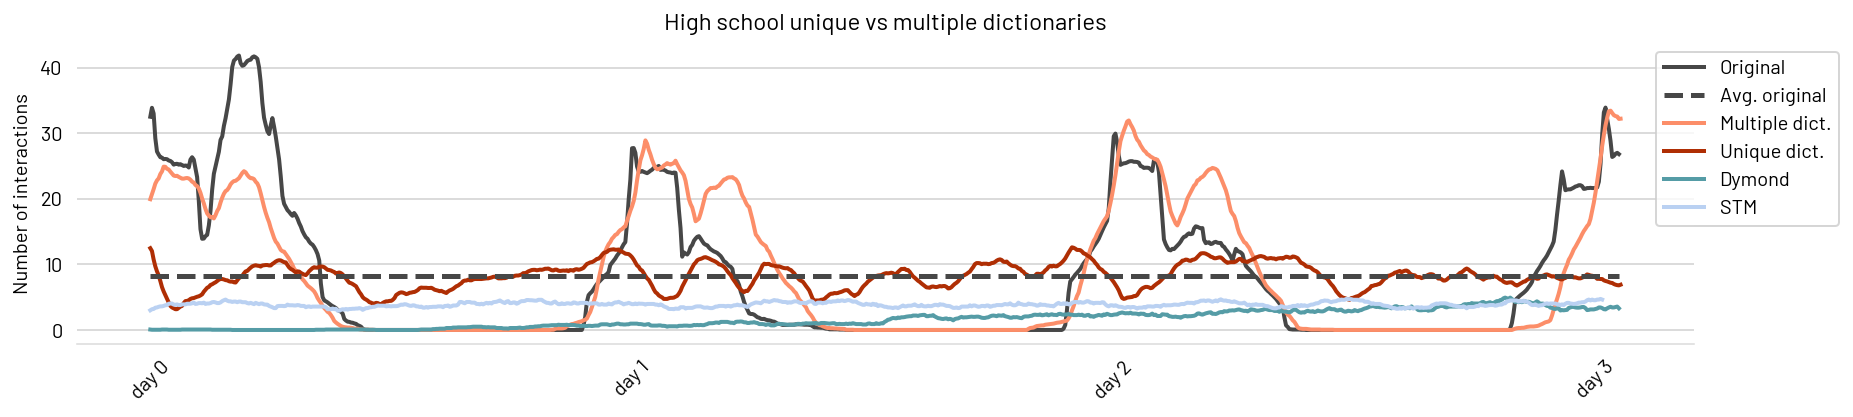

In [157]:
figure, axes = plt.subplots(nrows=1, ncols=1,figsize=(13,3))

medie = plot_nb_inter_one_axes(axes,orig_graph,graphs_etn,graphs_etn_ud,
                               graphs_dy,graphs_st,line_width=2)


from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=ORIGINAL_COLOR, lw=2),
                Line2D([0], [0], color=ORIGINAL_COLOR, lw=2.5,linestyle='dashed'),
                Line2D([0], [0], color="#fc8e69", lw=2),
                Line2D([0], [0], color="#af2e04", lw=2),
                Line2D([0], [0], color=DYM_COLOR, lw=2),
                Line2D([0], [0], color=STM_COLOR, lw=2)]

axes.legend(custom_lines, ['Original', 'Avg. original', 'Multiple dict.', 'Unique dict.',"Dymond","STM"]
            ,bbox_to_anchor=(0.97, 1))


print(medie)
figure.tight_layout()
plt.savefig("../unique_dictionary/"+file_name+"nb_interacions_unique_dict.pdf", bbox_inches = 'tight')
plt.show()